In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_sample_image
china = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(china)

#returns the dimension of the image array
china.shape

In [ ]:
#reshape the data in n_samples X n_features and rescale the colors so that they lie between 0 and 1
data = china/255.0 #use scale 0..1
data = data.reshape(427*640,3)
data.shape

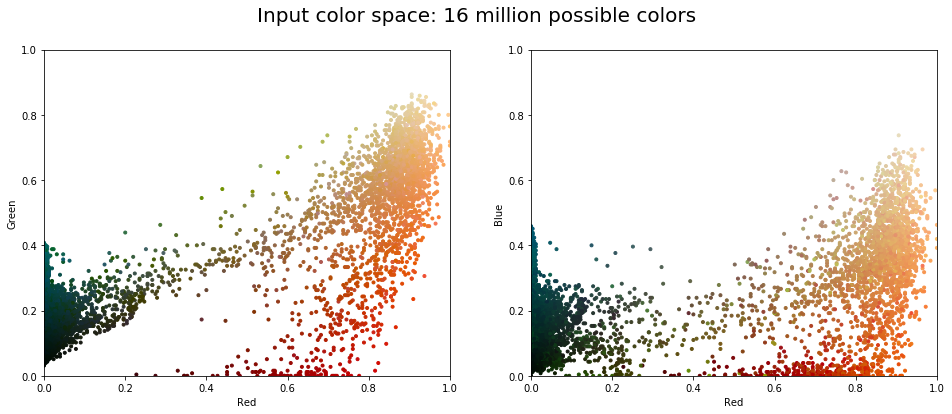

In [37]:
#visualize these pixels in this color space using a subset of 10000 pixes for efficiency
def plot_pixel(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R,G,B = data[i].T
    
    fig,ax = plt.subplots(1, 2, figsize=(16,6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0,1), ylim=(0,1))
    
    fig.suptitle(title, size=20)

plot_pixel(data, title='Input color space: 16 million possible colors')

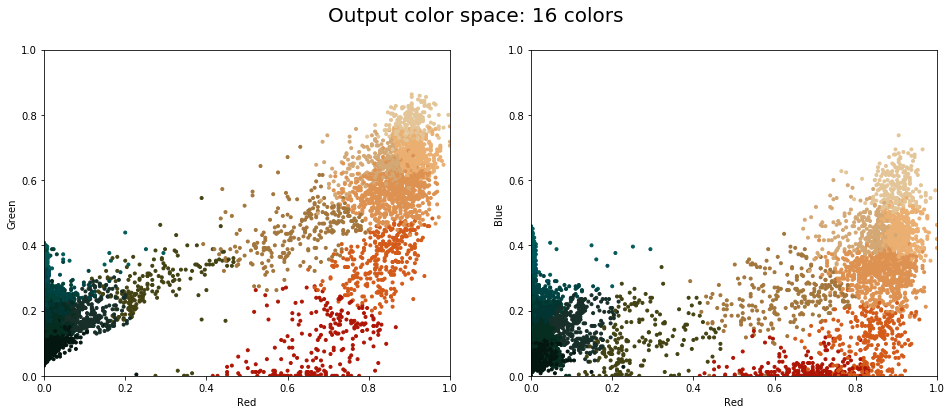

In [39]:
import warnings; warnings.simplefilter('ignore') #Fix NumPy issues

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixel(data, colors=new_colors, title="Output color space: 16 colors")

Text(0.5, 1.0, '16-color image')

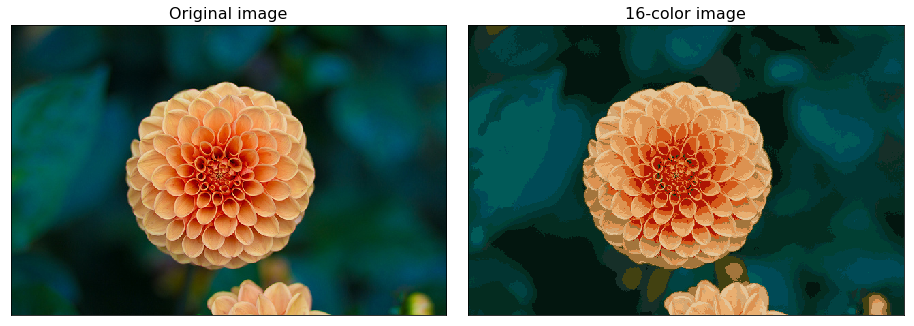

In [41]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16,6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color image', size=16)